# Pythonでグラフを書く方法（入門編）

- 本ノートブックでは `pandas`の`DataFrame`にデータを格納し、`matplotlib`でグラフ化する方法を実例で示す。
- 三角関数と逆三角関数をプロットする。

---

# 0. 前準備

- ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
#
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

- ファイル入出力準備
  - Google Drive をマウント

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# GoogleDrive内のColabNotebooksディレクトリへ移動
%cd "/content/drive/My Drive/Colab Notebooks/"
# 作業ディレクトリへ移動
%cd "./seminar_support/TIPs"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/seminar_support/TIPs


---
# 1. グラフ描画用データの作成

基本方針： **空の`pd.DataFrame`にデータを詰める**

In [3]:
# 空のDataFrameを作成
df_sin = pd.DataFrame()
# x軸の値を新規設定
df_sin['x'] = np.linspace(-np.pi-0.5, np.pi+0.5, 51)
# y軸の値を設定
df_sin['sin(x)'] = np.sin(df_sin['x'])
df_sin['cos(x)'] = np.cos(df_sin['x'])
# 作成結果を確認
print(df_sin.head())
print(df_sin.tail())

          x    sin(x)    cos(x)
0 -3.641593  0.479426 -0.877583
1 -3.495929  0.346968 -0.937877
2 -3.350265  0.207161 -0.978307
3 -3.204602  0.062967 -0.998016
4 -3.058938 -0.082561 -0.996586
           x    sin(x)    cos(x)
46  3.058938  0.082561 -0.996586
47  3.204602 -0.062967 -0.998016
48  3.350265 -0.207161 -0.978307
49  3.495929 -0.346968 -0.937877
50  3.641593 -0.479426 -0.877583


In [4]:
# tan(x) は定義域を変えたほうが見やすいので別のdfを準備
df_tan = pd.DataFrame()
# x軸の値を新規設定
df_tan['x'] = np.linspace(-np.pi/2+0.1, np.pi/2-0.1, 51)
# y軸の値を設定
df_tan['tan(x)'] = np.tan(df_tan['x'])
# 逆三角関数グラフを作るための準備
df_tan['x+pi'] = df_tan['x'] + np.pi
df_tan['x-pi'] = df_tan['x'] - np.pi

---

# 2. グラフ作成

## 2.1. 三角関数のグラフ作成

- 色分け・凡例を `pd.DataFrame` と `matplotlib` が自動でやってくれるのがとても便利

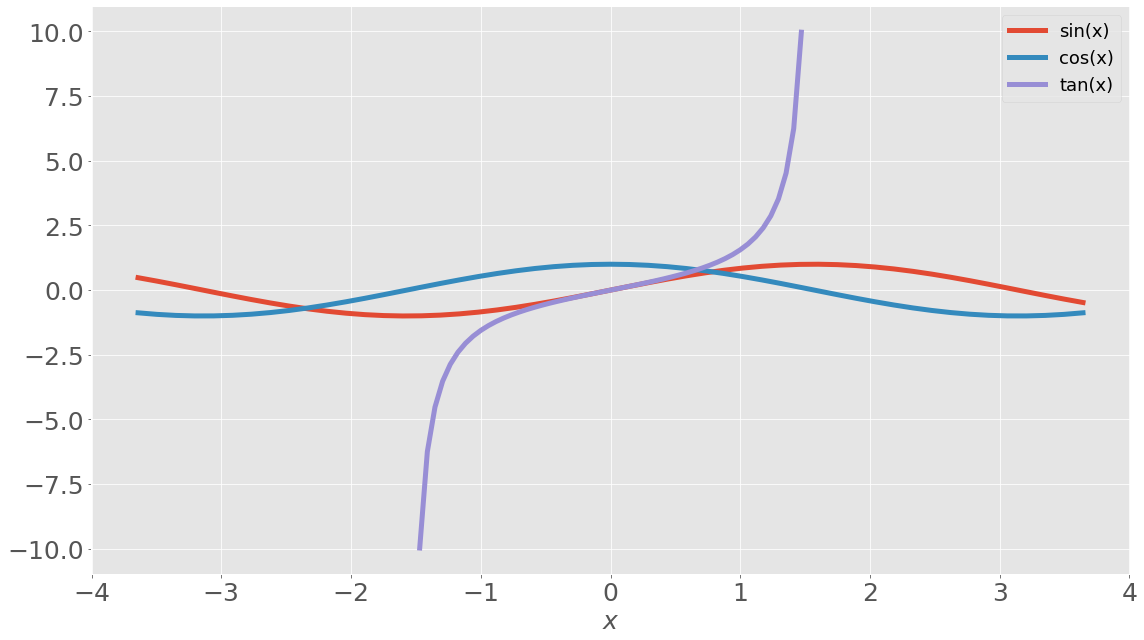

In [5]:
# 描画キャンバスを準備
fig, ax = plt.subplots(ncols=1, nrows=1, sharex='all', figsize=(16, 9))
# 線でグラフを描く
df_sin.plot.line(ax=ax, x='x', y='sin(x)', linewidth=5)
df_sin.plot.line(ax=ax, x='x', y='cos(x)', linewidth=5)
df_tan.plot.line(ax=ax, x='x', y='tan(x)', linewidth=5) # 別dfのデータでも同一グラフにプロットできる
#　ラベルを付ける
plt.xlabel("$x$", fontsize=25)
plt.ylabel("", fontsize=25)
# 文字サイズ調整
plt.legend(fontsize=18)
plt.tick_params(labelsize=25)
# 余白の削除 (地味に便利)
plt.tight_layout()
# 画像ファイルへの出力
plt.savefig('sin.pdf')
# ノートブック上でのグラフ確認
plt.show()
plt.close()

## 2.2. 逆三角関数のグラフ

複数のグラフを並べて描くこともできる。

In [6]:
# # 補助専用df
df = pd.DataFrame()
df['x'] = np.linspace(df_tan['tan(x)'].min(), df_tan['tan(x)'].max(), 51)
df['pi/2'] = np.pi/2
df['-pi/2'] = -np.pi/2

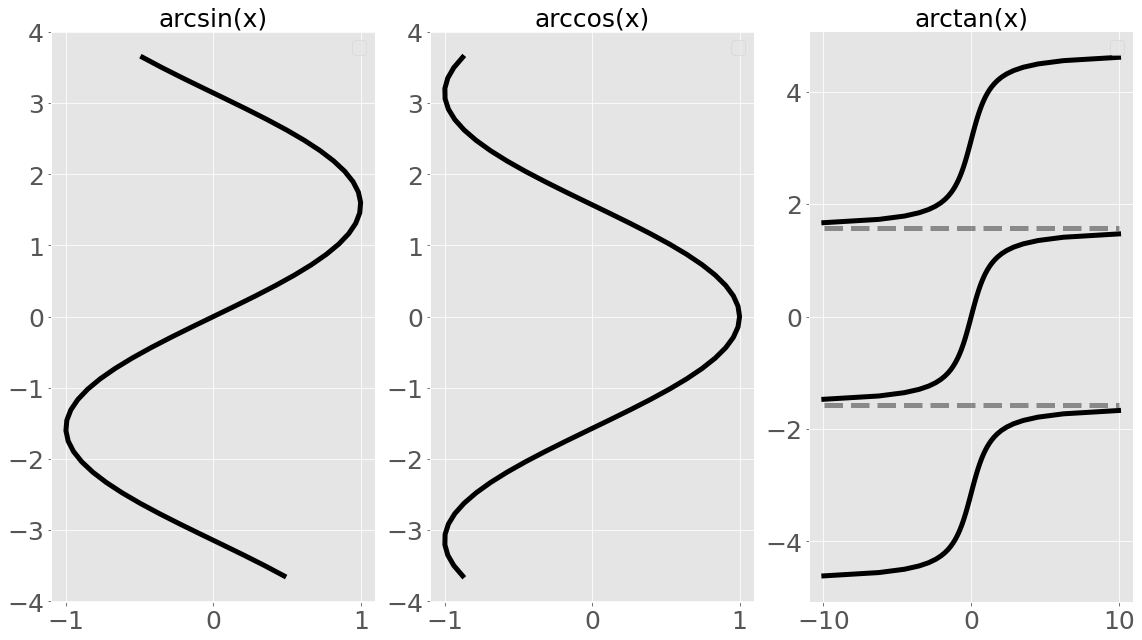

In [7]:
# 描画キャンバスを準備 / 1行3列
fig, ax = plt.subplots(nrows=1, ncols=3, sharex='none', figsize=(16, 9))
#
df_sin.plot.line(ax=ax[0], x='sin(x)', y='x', linewidth=5, color="black")
df_sin.plot.line(ax=ax[1], x='cos(x)', y='x', linewidth=5, color="black")
#
df_tan.plot.line(ax=ax[2], x='tan(x)', y='x', linewidth=5, color="black")
df_tan.plot.line(ax=ax[2], x='tan(x)', y='x+pi', linewidth=5, color="black")
df_tan.plot.line(ax=ax[2], x='tan(x)', y='x-pi', linewidth=5, color="black")
#
df.plot.line(ax=ax[2], x='x', y='pi/2', linewidth=5, linestyle="--", color="black", alpha=0.4)
df.plot.line(ax=ax[2], x='x', y='-pi/2', linewidth=5, linestyle="--", color="black", alpha=0.4)

#　ラベルを付ける
ax[0].set_title('arcsin(x)', fontsize=25)
ax[1].set_title('arccos(x)', fontsize=25)
ax[2].set_title('arctan(x)', fontsize=25)
# 文字サイズ調整
for i in range(3):
  ax[i].set_xlabel("", fontsize=25)
  ax[i].set_ylabel("", fontsize=25)
  ax[i].legend("", fontsize=18)
  ax[i].tick_params(labelsize=25)

# 余白の削除 (地味に便利)
plt.tight_layout()
# 画像ファイルへの出力
plt.savefig('arcsin.pdf')
# ノートブック上でのグラフ確認
plt.show()
plt.close()

グラフの並びを2行2列にしたいなら

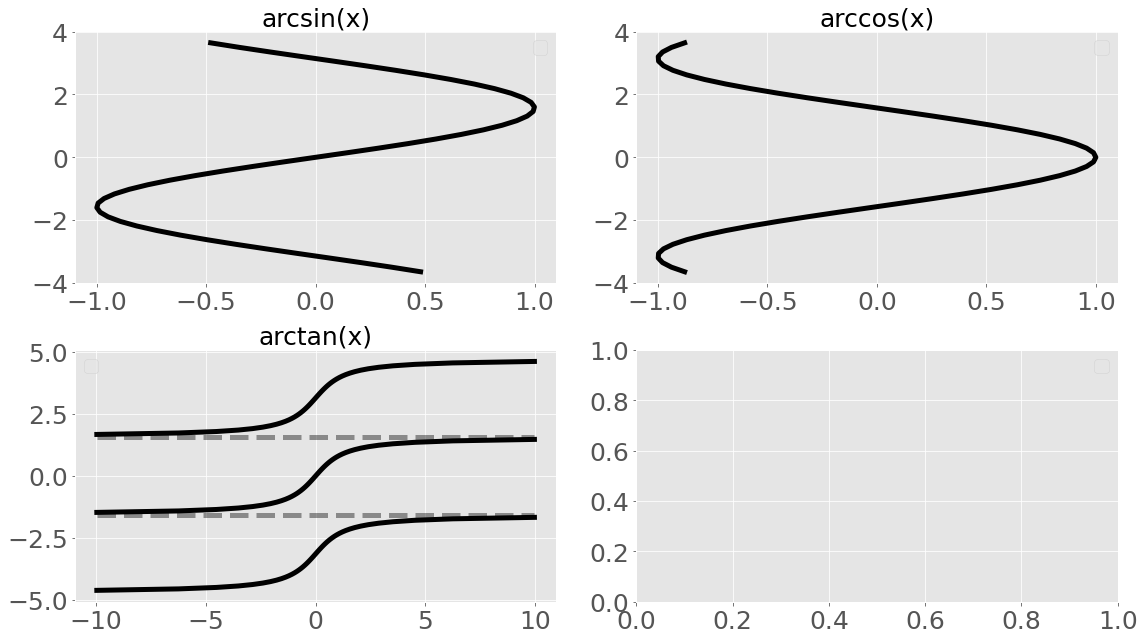

In [8]:
# 描画キャンバスを準備 / 2行2列
fig, ax = plt.subplots(nrows=2, ncols=2, sharex='none', figsize=(16, 9))
# axで表示させる"パネル"を指定するイメージ
df_sin.plot.line(ax=ax[0][0], x='sin(x)', y='x', linewidth=5, color="black")
df_sin.plot.line(ax=ax[0][1], x='cos(x)', y='x', linewidth=5, color="black")
#
df_tan.plot.line(ax=ax[1][0], x='tan(x)', y='x', linewidth=5, color="black")
df_tan.plot.line(ax=ax[1][0], x='tan(x)', y='x+pi', linewidth=5, color="black")
df_tan.plot.line(ax=ax[1][0], x='tan(x)', y='x-pi', linewidth=5, color="black")
#
df.plot.line(ax=ax[1][0], x='x', y='pi/2', linewidth=5, linestyle="--", color="black", alpha=0.4)
df.plot.line(ax=ax[1][0], x='x', y='-pi/2', linewidth=5, linestyle="--", color="black", alpha=0.4)

#　ラベルを付ける
ax[0][0].set_title('arcsin(x)', fontsize=25)
ax[0][1].set_title('arccos(x)', fontsize=25)
ax[1][0].set_title('arctan(x)', fontsize=25)
# 文字サイズ調整
for i in range(2):
  for j in range(2):
    ax[i][j].set_xlabel("", fontsize=25)
    ax[i][j].set_ylabel("", fontsize=25)
    ax[i][j].legend("", fontsize=18)
    ax[i][j].tick_params(labelsize=25)

# 余白の削除 (地味に便利)
plt.tight_layout()
# 画像ファイルへの出力
plt.savefig('arcsin2.pdf')
# ノートブック上でのグラフ確認
plt.show()
plt.close()